In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  

In [137]:
df_train=pd.read_csv("fraudTest.csv")
df_test=pd.read_csv('fraudTest.csv')

# EDA

In [138]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [139]:
df_train = df_train.drop(columns=['Unnamed: 0'])

In [140]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [141]:
df_test = df_test.drop(columns=['Unnamed: 0'])

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [143]:
#checking for Null values
print(f'Null value \n: {df_train.isnull().sum()}')

Null value 
: trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [144]:
print(f'Dublicates: {df_train.duplicated().sum()}')

Dublicates: 0


In [145]:
df_train['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

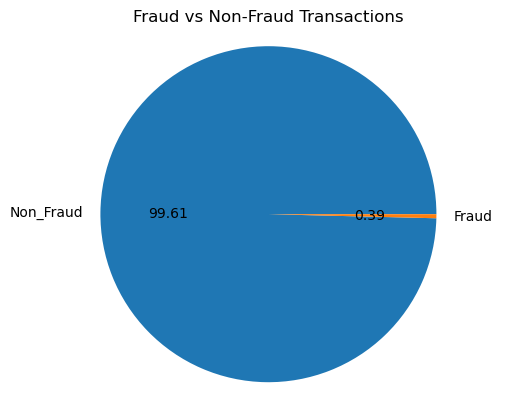

In [146]:
plt.title('Fraud vs Non-Fraud Transactions')

plt.pie(df_train['is_fraud'].value_counts(),labels=['Non_Fraud',"Fraud"],autopct='%.2f')
plt.axis('equal')
plt.show()

In [147]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


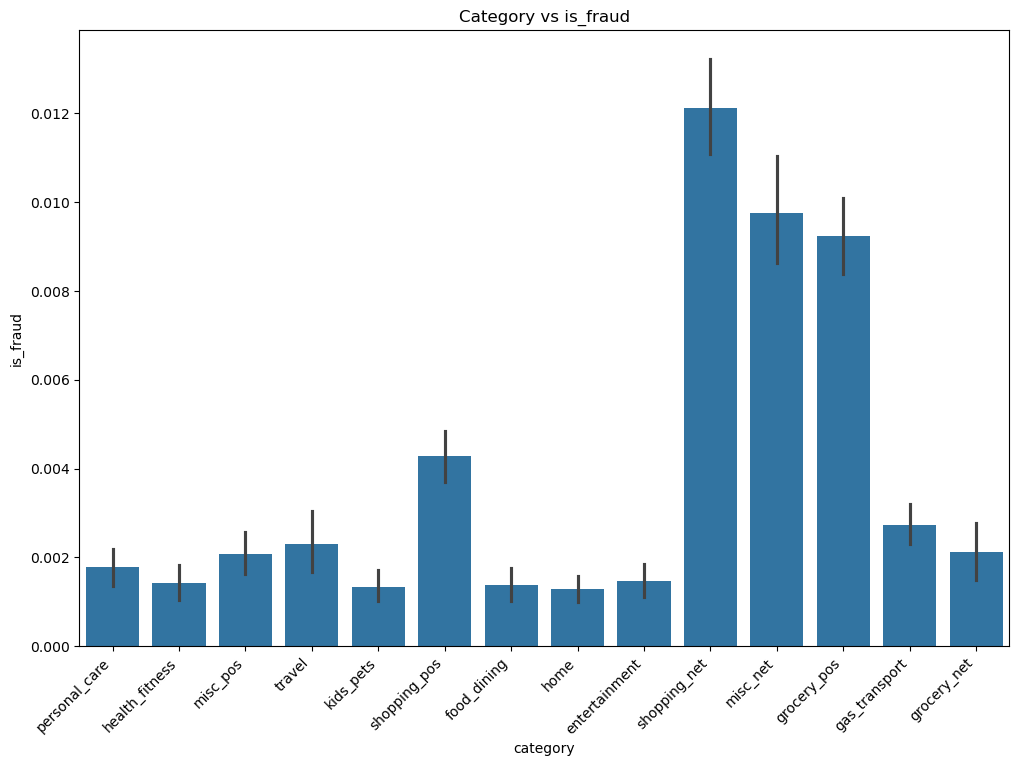

In [148]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45, ha='right')
sns.barplot(x='category',y='is_fraud',data=df_train)
plt.title("Category vs is_fraud")
plt.show()

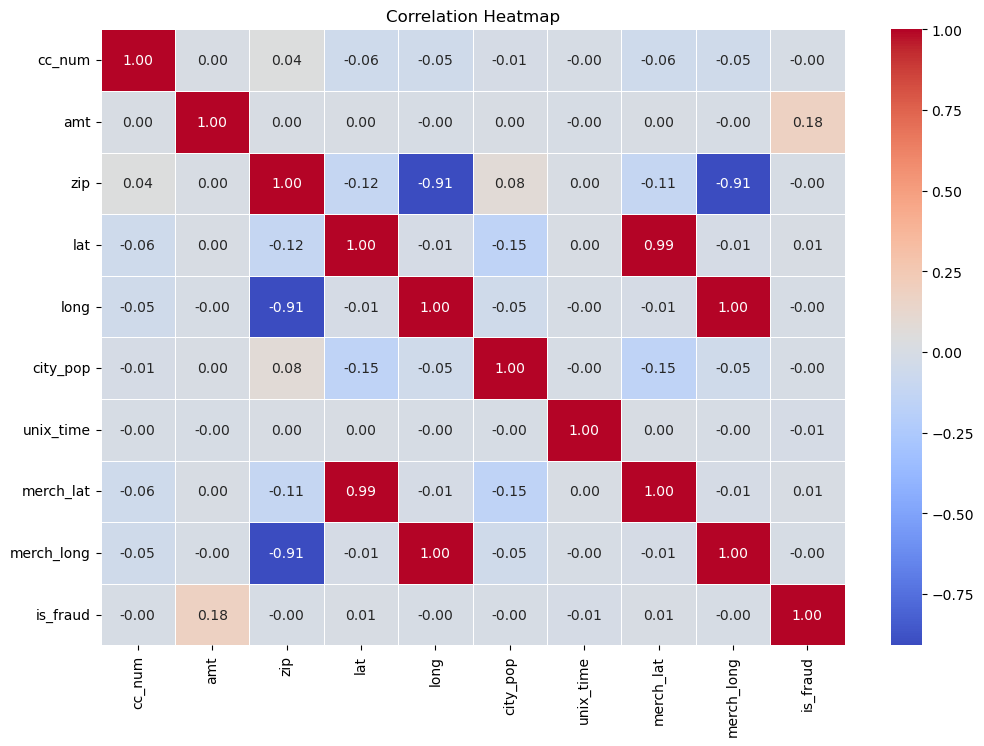

In [149]:
plt.figure(figsize=(12,8))
correlation_matrix=df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

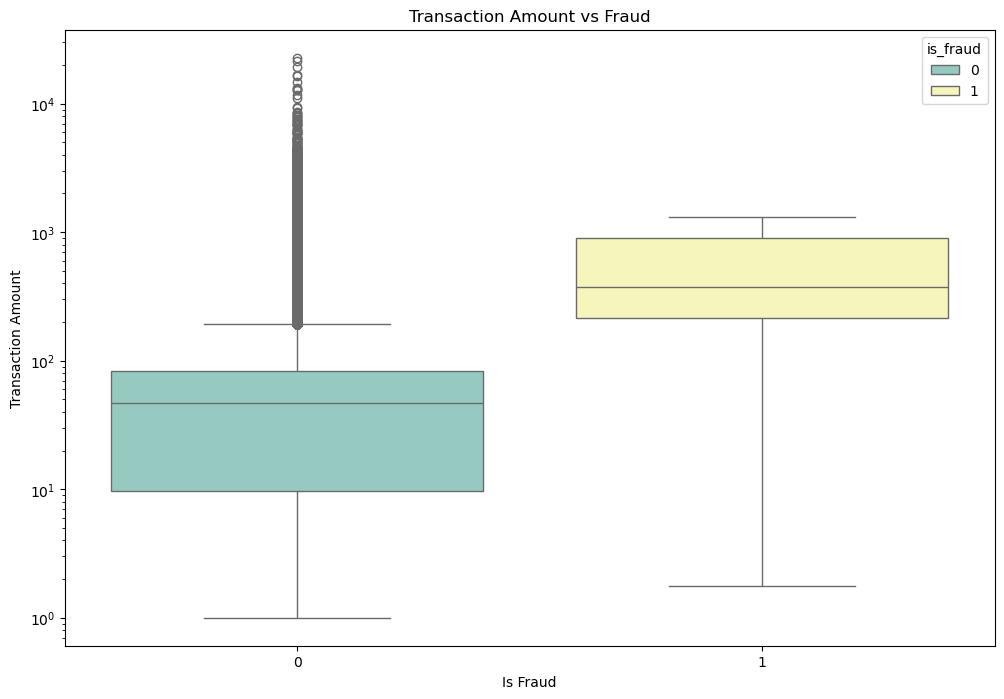

In [150]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=df_train, hue='is_fraud',palette='Set3')
plt.title('Transaction Amount vs Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log') 
plt.show()


In [196]:
def haversine_df(row):
    # Radius of Earth in kilometers
    R = 6371

    # Convert from degrees to radians
    lat1 = np.radians(row['lat'])
    lon1 = np.radians(row['long'])
    lat2 = np.radians(row['merch_lat'])
    lon2 = np.radians(row['merch_long'])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c
df_train['dis']=df_train.apply(haversine_df,axis=1)
df_test['dis']=df_test.apply(haversine_df,axis=1)

In [197]:


def encode(df):
    encoder = LabelEncoder()
    df.loc[:, 'job'] = encoder.fit_transform(df['job'])
    df.loc[:, 'category'] = encoder.fit_transform(df['category'])
    # df.loc[:, 'merchant'] = encoder.fit_transform(df['merchant'])
    df.loc[:, 'gender'] = encoder.fit_transform(df['gender'])
    return df

training_set=df_train[['category','amt','gender','zip','lat','long','job','unix_time','merch_lat','merch_long','is_fraud']]
testing_set=df_test[['category','amt','gender','zip','lat','long','job','unix_time','merch_lat','merch_long','is_fraud']]
encode(training_set)
encode(testing_set)


,category,amt,gender,zip,lat,long,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,29209,33.9659,-80.9355,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,84002,40.3207,-110.4360,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,11710,40.6729,-73.5365,259,1371816893,40.495810,-74.196111,0
3,9,60.05,1,32780,28.5697,-80.8191,407,1371816915,28.812398,-80.883061,0
4,13,3.19,1,49632,44.2529,-85.0170,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,5,43.77,1,63453,40.4931,-91.8912,460,1388534347,39.946837,-91.333331,0
555715,7,111.84,1,77566,29.0393,-95.4401,198,1388534349,29.661049,-96.186633,0
555716,7,86.88,0,99323,46.1966,-118.9017,294,1388534355,46.658340,-119.715054,0
555717,13,7.99,1,83643,44.6255,-116.4493,58,1388534364,44.470525,-117.080888,0


In [198]:
y_train=training_set['is_fraud']
X_train=training_set.drop(columns='is_fraud')



In [199]:
y_test=testing_set['is_fraud']
X_test=testing_set.drop(columns='is_fraud')


In [200]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test=sc.transform(X_test)



# Model Training

In [201]:
rf = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.2, class_weight='balanced',bootstrap=True, random_state=42)

In [202]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_samples=0.2,
                       n_estimators=30, random_state=42)

In [211]:
y_predict = (rf.predict_proba(X_test)[:, 1] >= 0.2).astype(int)
y_pred_prob = rf.predict_proba(X_test) 

accuracy = accuracy_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("precision_score:", precision)
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))


Accuracy: 0.9983048986988028
ROC AUC Score: 0.9993441048889824
precision_score: 0.7167567567567568
Recall: 0.9272727272727272
F1 Score: 0.8085365853658537
